### Project_II - Wrangling and Analyzing Data [@WeRateDogs]
This project will consist of three major stages, **Data Gathering**, sometimes called acquiring or collecting data, **Data Assessing**, and **Data Cleaning**.

### Table of Contents
<ul>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Data Assessing</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#EDA">Analyzing and Visualizing Data</a></li> 
</ul>

- **Import Libraries and Software needed to Wrangle and Analyze Data**

In [1]:
#To Import libraries & softwares
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

<a id='Gathering'></a>
#### 1. Data Gathering
**A. Directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [2]:
#Reading the data 'twitter_archive_enhanced.csv' to a dataframe using pd.read_csv() function
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#To confirm operation
twitter_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**B. Using the Requests library to programmatically download the tweet image prediction data (image_predictions.tsv)**

In [4]:
#Importing Package
import requests

In [5]:
#To download 'image_predictions.tsv' programmatically using request library
#Assigning variable to the url
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(URL)

#To open the file
with open(URL.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)

#To read the file into a dataframe using pd.read_csv() function
image_df = pd.read_csv(URL, sep = '\t')

In [6]:
r

<Response [200]>

In [7]:
#To confirm operation
image_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### C. Using Tweepy library to query (gather) additional data via Twitter API (tweet_json.txt)

In [8]:
#Importing packages
from tweepy import OAuthHandler
from timeit import default_timer as timer
import time
import json
import tweepy

In [9]:
#My API credentials
api_key = 'xxxxxxxxxxxxxxxxxxxxxxxx'
api_key_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [10]:
#To Authenticate my account or app to the twitter_API
auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#To access twitter account or timeline
api = tweepy.API(auth, wait_on_rate_limit = True)


#To Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
#To Create an error dictionary to catch errors that might occur
error_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in twitter_df['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #To catch the error    
        except tweepy.TweepyException as error:
            print("Error")
            error_dict[tweet_id] = error
            pass
end = timer()
print(end - start)
print(error_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Error
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072

Rate limit reached. Sleeping for: 313


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 178


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [11]:
#Checking for the numbers errors caught
len(error_dict)

31

In [12]:
#To read the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count

#To Create an empty list
df_list = []
# Opening and Reading text file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        # Getting the requred columns
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending the columns to the list
        df_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})
        
#To convert it to pandas dataframe        
api_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [13]:
#To confirm operation
api_df.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6861,32860
1,892177421306343426,5169,28382


<a id='Assessing'></a>
#### 2. Data Assessing
Here, we would be assessing the datasets both visually and programmatically.

#### Visual Assessment
I leafed through the entirety of the dataset here in pandas, and also using spreadsheet application.

In [14]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


This dataframe consists of 2356 records and 17 variables

- tweet_id - unique id for each tweet by the twitter account @DogRates
- timestamp - Time the tweet was tweeted
- source - Device used to tweet
- text - Tweet content
- rating_numerator - The numerator ratings for dog. It is usually from 10 upward
- rating_denominator - The denominator ratings for dog. It is constantly 10.
- name - The name of dogs
- doggo, floofer, pupper & puppo - These are different dog stages

In [15]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


This dataframe consists of 2075 records and 12 variables

- tweet_id - unique id for each tweet by the twitter account
- jpg_url -  url for each dog image
- img_num - Image number. It is between 1 - 4
- p1, p2 & p3 - This is the algorithm's #1 prediction for the image in the tweet
- p1_conf, p2_conf & p3_conf - This values shows the confidence of the algorithm in its prediction
- p1_dog, p2_dog & p3_dog - A determiner whether or not the prediction (p1, p2 & p3) is a breed of dog. TRUE for dog breed and FALSE not a dog breed

In [16]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6861,32860
1,892177421306343426,5169,28382
2,891815181378084864,3411,21333
3,891689557279858688,7074,35824
4,891327558926688256,7578,34248
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


This dataframe consists of 2354 records and 3 variables

- tweet_id - unique id for each tweet by the twitter account
- retweet_count - The number of times an orignal tweet is retweeted or shared
- favorite_count - The number of times a tweet is like. It has since been changed to LIKED

#### Programmatic Assessment
Programmatic assessment using functions and methods to reveal something about your data's quality and tidiness

**A. `twitter_archive_enhanced.csv` Dataframe**

In [17]:
#To see the first five records of the dataframe
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The `.head()` method returns the first 5 rows and column names if a number is not specified.

In [18]:
#To see the last five records of the dataframe
twitter_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


The `.tail()` method returns the last 5 rows and column names if a number is not specified.

In [19]:
#To return a tuple of the dimensions of the dataframe
twitter_df.shape

(2356, 17)

In [20]:
#To see the whole variables in the data frame
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [21]:
#To check datatypes, shape and missing values of each variable
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The result clearly shows that there are enough missing values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` & `retweeted_status_timestamp` variables. `tweet_id` and `timestamp` variables has the wrong datatype.

In [22]:
#To check the counts of unique values in `rating_mumerator` column
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [23]:
#To check the counts of `rating_denominator` not equal ten
twitter_df.rating_denominator[twitter_df.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [24]:
#Alternatively
twitter_df.loc[twitter_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [25]:
#To check the number of 'rating_denominator' that is not egual to ten 
print(len(twitter_df.loc[twitter_df['rating_denominator'] != 10]))

23


In [26]:
#To check unique value_counts on the 'name' column
twitter_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
#To check for unique values in 'name' column
twitter_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [28]:
#To check for missing data. This function returns a boolean data frame for missing data 
twitter_df.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [29]:
#To check for missing values or data
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [30]:
#To Check for the number of unique values in each column of the dataframe
twitter_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [31]:
#Checking for duplicated rows
sum(twitter_df.duplicated())

0

In [32]:
#To check for duplicate using duplicated() function on 'tweet_id'
twitter_df[twitter_df['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
#To check for unique entries in 'source' column
twitter_df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [34]:
#To check for unique entries in 'text' column
twitter_df['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

In [35]:
#To check for retweet in 'text' columns that contain incorrect ratings
twitter_df[twitter_df.text.str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [36]:
#To check for rows that have retweet values (not blank or non-null)
print(twitter_df.retweeted_status_id.notnull().sum())
print(twitter_df.retweeted_status_user_id.notnull().sum())
print(twitter_df.retweeted_status_timestamp.notnull().sum())

181
181
181


In [37]:
#To check for unique entries
twitter_df.retweeted_status_id.unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

**B. `image_predictions` Dataframe**

In [38]:
#To see the first five records of the dataframe
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
#To see the last five records of the dataframe
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [40]:
#To return a tuple of the dimensions of the dataframe
image_df.shape

(2075, 12)

In [41]:
#To see the whole variables in the data frame
image_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Some of the column headers are not descriptive enough.

In [42]:
#To check datatypes, shape and missing values of each variable
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


This result shows that there are no missing values in this dataframe, and all the variables except for `tweet_id` have the correct datatypes.

In [43]:
#Checking for duplicated rows
sum(image_df.duplicated())

0

In [44]:
#Using isnull() function to check for missing data
nan_row  = image_df[image_df.isnull().any(axis = 1)]
nan_row

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
#To check for unique values
image_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

**C. `tweet_json.txt` Dataframe**

In [46]:
#To see the first five records of the dataframe
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6861,32860
1,892177421306343426,5169,28382
2,891815181378084864,3411,21333
3,891689557279858688,7074,35824
4,891327558926688256,7578,34248


In [47]:
#To see the last five records of the dataframe
api_df.tail()

,tweet_id,retweet_count,favorite_count
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111
2324,666020888022790149,417,2226


In [48]:
#To return a tuple of the dimensions of the dataframe
api_df.shape

(2325, 3)

In [49]:
#To check datatypes, shape and missing values of each variable
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [50]:
#To check for duplicated records
api_df.sum().duplicated()

tweet_id          False
retweet_count     False
favorite_count    False
dtype: bool

In [51]:
#To get summary statistic of the numerical variable of the dataset
api_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2419.003871,6860.271398
std,6.814903e+16,4094.241814,10654.786035
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,487.000000,1197.000000
50%,7.177900e+17,1125.000000,2973.000000
75%,7.986285e+17,2799.000000,8390.000000
max,8.924206e+17,69219.000000,141452.000000


The whole columns have the same **count** which is 2323.000000. The maximum retweet_count is 69260.000000 while the maximum favorite_count is 141478.000000.

In [52]:
#To check missing values or data in each variable
api_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

#### Quality Issues - Visual/Programmatic Assessment
*Twitter_archive_enhanced*
- The `text` column contains some records that are retweets, and the ratings are not dog ratings. Therefore, those records need to be dropped.
-  The `rating_denominator` column in the twitter_df table has ratings that are above the value 10. The standard denominator rating is 10.
- The `source` variable in the twitter_df table contains tags, URLs, and text. The text needs to be extracted from the source column of each record, i.e, what device was used to tweet per time.
- Some dog names in the `name` variable are lowercase, while others are one-word names. They all need to be filtered out
- The `text` variable contains tweets, URLs, and ratings. Actual tweets need to be extracted from the column and stored in a new column called tweet
- The data type of these variables, `tweet_id`, `timestamp`, `retweeted_status_timestamp`
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `stage` should be formatted.
-  Variables like in_reply_to_status_id, in_reply_to_user_id, text, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls in the twitter_clean_df table would be dropped because they contain too many missing values, besides if used could lead to incorrect analysis.

*Image_prediction & API_df*
- The datatypes of the 'tweet_id' variable of the image_clean_df table and api_clean_df table are int. They need to be formatted to a string

#### Tidiness Issues - Visual/Programmatic Assessment
- Remove retweets from rows that have values (not blank or non-null) in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp columns`.
- Variable are spread into four columns in the twitter_clean_df table. Dog stages (doggo, floofer, pupper, and Puppo) need to be joined into one column.
- Combined the three different dataframes into one.

<a id='Cleaning'></a>
#### 3. Cleaning Data
This is where I'd fix the quality and tidiness issues that I identified in the Assess step. This would be done programmatically in three steps:

- **Define** - Defining a data cleaning plan in writing by converting my assessments into cleaning tasks by writing little how-to guides. This plan also serves as documentation so that your work can be reproduced.
- **Code** - Converting my definitions into executable code.
- **Test** - Test my data often using code to ensure my code was implemented correctly.

Completeness (Missing Data) issues would be tackled first, followed by tidiness issues and then quality issues. However, there is no completeness issue.

**Firstly, make a copy of the dataset**

In [53]:
#To make copies of the original dataset
twitter_clean_df = twitter_df.copy()
image_clean_df = image_df.copy()
api_clean_df = api_df.copy()

#### Adrressing Issues
#### 1. Remove retweets from rows that have values (not blank or non-null) in `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp columns`.
- *Define*

Used the `isnull()` function to filter for records where retweets are null.

- *Code*

In [54]:
#Filtering rows with retweets wheree the values are null in retweet_related columns.
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_id.isnull()]
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_user_id.isnull()]
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_timestamp.isnull()]

- *Test*

In [55]:
#To confirm operation
print(twitter_clean_df.retweeted_status_id.notnull().sum())
print(twitter_clean_df.retweeted_status_user_id.notnull().sum())
print(twitter_clean_df.retweeted_status_timestamp.notnull().sum())

0
0
0


#### 2. The `text` column contains some records that are retweets, and the ratings are not dog ratings. Therefore, those records need to be dropped.
- *Define*

Removed retweets (retweet rows) with incorrect dog ratings using regex

- *Code*

In [56]:
#To check for rows that contain retweet in 'text' column
twitter_clean_df[twitter_clean_df.text.str.contains('RT @')].head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Fixing issue number 1 automatically took care of issue number 2.**

#### 3. The `rating_denominator` column in the twitter_df table  has ratings that are above the value 10. The standard denominator rating is 10.
- *Define*

Used the `query()` function to filter for records that only have the standard 10 for rating as the denominator.

- *Code*

In [57]:
#To check the number of records with 'rating_denominator' not equal ten
x = twitter_clean_df.query('rating_denominator != 10')
print(len(x))

#To filter for only rows equal to 10 using query() function
twitter_clean_df = twitter_clean_df.query('rating_denominator == 10')

22


- *Test*

In [58]:
#To confirm operation
len(twitter_clean_df.query('rating_denominator != 10'))

0

#### 4. The `source` variable in the twitter_df table contains tags, URLs, and text. The text needs to be extracted from the source column of each record, i.e, what device was used to tweet per time.
- *Define*

Removed HTML tags from `source` column to make it more readable using `str.extract()` method and then dropping the **source** column

In [59]:
#To check for unique entries in 'source' column
twitter_clean_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2020
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- *Code*

In [60]:
#To extract text from 'source' column using regex
twitter_clean_df['source_'] = twitter_clean_df['source'].str.extract(r'([A-Z].*)<')
#To drop the 'source' column
twitter_clean_df = twitter_clean_df.drop('source', axis = 1)

- *Test*

In [61]:
#To confirm operation
twitter_clean_df['source_'].value_counts()

Twitter for iPhone     2020
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source_, dtype: int64

#### 5. Some dog names in the `name` variable are lowercase, while others are one-word names. They all need to be filtered out
- *Define*

Cleaned invalid dog names like ['a', 'such', 'getting', etc] 

- *Code*

In [62]:
#To check the number of names that are lower_case using reGex. It returns a boolean.
invalid_names = twitter_clean_df['name'].str.contains('^[a-z]')
invalid_names.value_counts()

False    2052
True      101
Name: name, dtype: int64

In [63]:
#To Filter for records or names that contains only upper_case
twitter_clean_df = twitter_clean_df[twitter_clean_df['name'].str.contains('^[A-Z]+')]

In [64]:
#To check for unique values
twitter_clean_df['name'].value_counts()

None          664
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 929, dtype: int64

In [65]:
#Replacing 'None' with np.NaN
twitter_clean_df['name'].replace('None', np.NaN, inplace = True)

- *Test*

In [66]:
#To confirm operation
twitter_clean_df[invalid_names].value_counts()

Series([], dtype: int64)

#### 6. Variable are spread into four columns in the twitter_clean_df table. Dog stages (doggo, floofer, pupper, and Puppo) need to be joined into one column.
- *Define*

Created a variable called stage and joined doggo, floofer, pupper, and puppo variables into it.

- *Code*

In [67]:
# Replacing none in the respective columns with an empty string("")
twitter_clean_df['doggo'].replace("None",  "", inplace=True)
twitter_clean_df['floofer'].replace("None", "", inplace=True)
twitter_clean_df['pupper'].replace("None", "", inplace=True)
twitter_clean_df['puppo'].replace("None", "", inplace=True)

# Used lambda() function to join the stage columns into one
twitter_clean_df['stage'] = twitter_clean_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

#To Drop the columns
twitter_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [68]:
#To confirm operation
twitter_clean_df['stage'].value_counts()

                1722
pupper           213
doggo             73
puppo             24
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [69]:
#Format entries with multiple dog stages.
twitter_clean_df.loc[twitter_clean_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_clean_df.loc[twitter_clean_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_clean_df.loc[twitter_clean_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [70]:
#Replace the empty string ("") with np.NaN
twitter_clean_df.stage.replace({'': np.NaN}, inplace = True)

In [71]:
#To confirm operation
twitter_clean_df['stage'].value_counts()

pupper           213
doggo             73
puppo             24
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

- *Test*

In [72]:
twitter_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'source_', 'stage'],
      dtype='object')

In [73]:
twitter_clean_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Twitter for iPhone,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,NaN


#### 7.  The `text` variable contains tweets, URLs, and ratings. Actual tweets need to be extracted from the column and stored in a new column called tweet
- *Define*

Extracted actual tweet from the text column using `str.extract()` and `re` function

In [74]:
#To check the unique entries in 'text' column before extraction
twitter_clean_df['text'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx',
       'Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

- *Code*

In [75]:
#Extracting just the tweet using regex
twitter_clean_df['tweet'] = twitter_clean_df['text'].str.extract(r'([A-Z]\D*\D*)\s')

- *Test*

In [76]:
#To confirm operation
twitter_clean_df['tweet'].unique()

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.',
       ...,
       'Here we have a northern speckled Rhododendron. Much sass. Gives',
       'Here we have a',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair.'],
      dtype=object)

#### 8. The data type of these variables, `tweet_id`, `timestamp`, `retweeted_status_timestamp`
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `stage` should be formatted.
- *Define*

Changed columns to appropriate data type.  (1) All ID columns (tweet_id) should have string datatype (2) all categorical variables should have category datatype (3) all time-related columns should have datetime datatype.

- *Code*

In [77]:
#Using for loop and lambda function to convert to string datatypes
string_columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
for datatype in string_columns:
     twitter_clean_df[datatype] = twitter_clean_df[datatype].apply(lambda x: str(x))
        
#To convert 'timestamp' and 'retweeted_status_timestamp' columns to datetime
timestamp_columns = ['timestamp', 'retweeted_status_timestamp']
for c in timestamp_columns:
    twitter_clean_df[c] = pd.to_datetime(twitter_clean_df[c])

In [78]:
#Converting the datatypes to string
image_clean_df['tweet_id'] = image_clean_df['tweet_id'].astype(object)
api_clean_df['tweet_id'] = api_clean_df['tweet_id'].astype(object)
#Converting 'stage' datatype to category
twitter_clean_df['stage'] = twitter_clean_df['stage'].astype('category')

- *Test*

In [79]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2052 non-null   object             
 1   in_reply_to_status_id       2052 non-null   object             
 2   in_reply_to_user_id         2052 non-null   object             
 3   timestamp                   2052 non-null   datetime64[ns, UTC]
 4   text                        2052 non-null   object             
 5   retweeted_status_id         2052 non-null   object             
 6   retweeted_status_user_id    2052 non-null   object             
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 8   expanded_urls               1998 non-null   object             
 9   rating_numerator            2052 non-null   int64              
 10  rating_denominator          2052 non-null   int64           

In [80]:
api_clean_df.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

In [81]:
image_clean_df.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### 9. Variables like in_reply_to_status_id, in_reply_to_user_id, text, retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls in the twitter_clean_df table would be dropped because they contain too many missing values, besides if used could lead to incorrect analysis.
- *Define*

Dropped variables not needed

- *Code*

In [82]:
#To Drop columns not needed using drop() function
twitter_clean_df = twitter_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

- *Test*

In [83]:
#To confirm operation
twitter_clean_df.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'source_', 'stage', 'tweet'],
      dtype='object')

#### 10. Combined the three different dataframes into one.
- *Define*

Merged the three dataframes using `lambda` function & `reduce` module. Then, I created a new column called 'rating' for the combined rating_numerator and rating_denominator columns.

- *Code*

In [84]:
#Converting the datatype of 'tweet_id' for the three tables back to int for this operation.
twitter_clean_df['tweet_id'] = twitter_clean_df['tweet_id'].astype(int)
api_clean_df['tweet_id'] = api_clean_df['tweet_id'].astype(int)
image_clean_df['tweet_id'] = image_clean_df['tweet_id'].astype(int)

In [85]:
#Importing package
from functools import reduce

#Define list of the dataframe
DF = [twitter_clean_df, api_clean_df, image_clean_df]

#To merge all the dataframes into one
Combined_DF = reduce(lambda left, right: pd.merge(left, right, on = ['tweet_id'], how = 'inner'), DF)

In [86]:
#To confirm operation
Combined_DF.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,source_,stage,tweet,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,Twitter for iPhone,NaN,This is Phineas. He's a mystical boy. Only eve...,6861,32860,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,Twitter for iPhone,NaN,This is Tilly. She's just checking pup on you....,5169,28382,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [87]:
#To create a new column called 'Rating'
Combined_DF['rating'] = Combined_DF['rating_numerator'].astype(str) +"/"+ Combined_DF['rating_denominator'].astype(str)
#Dropped 'rating_numerator' & 'rating_denominator' variables
Combined_DF = Combined_DF.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [88]:
#To convert tweet_id, P1,P2, P3, to their respactive datatypes
Combined_DF['tweet_id'] = Combined_DF['tweet_id'].astype(str)
Combined_DF['p1'] = Combined_DF['p1'].astype('category')
Combined_DF['p2'] = Combined_DF['p2'].astype('category')
Combined_DF['p3'] = Combined_DF['p3'].astype('category')

In [89]:
#To comfirm operation
Combined_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1872
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1873 non-null   object             
 1   timestamp       1873 non-null   datetime64[ns, UTC]
 2   name            1340 non-null   object             
 3   source_         1873 non-null   object             
 4   stage           293 non-null    category           
 5   tweet           1857 non-null   object             
 6   retweet_count   1873 non-null   int64              
 7   favorite_count  1873 non-null   int64              
 8   jpg_url         1873 non-null   object             
 9   img_num         1873 non-null   int64              
 10  p1              1873 non-null   category           
 11  p1_conf         1873 non-null   float64            
 12  p1_dog          1873 non-null   bool               
 13  p2              1873 non-null   c

In [90]:
#To check for duplicated records
Combined_DF.duplicated().sum()

0

- *Test*

In [91]:
Combined_DF.sample(20)

,tweet_id,timestamp,name,source_,stage,tweet,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
79,872967104147763200,2017-06-09 00:02:31+00:00,NaN,Twitter for iPhone,doggo,Here's a very large dog. He has a date later. ...,4464,23366,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,12/10
816,730211855403241472,2016-05-11 01:44:07+00:00,Ziva,Twitter for iPhone,NaN,This is Ziva. She doesn't know how her collar ...,941,3405,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True,11/10
25,886736880519319552,2017-07-16 23:58:41+00:00,Mingus,Twitter for iPhone,NaN,This is Mingus. He's a wonderful father to his...,2569,10204,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True,13/10
1384,677228873407442944,2015-12-16 20:48:40+00:00,Chuq,Twitter for iPhone,NaN,Say hello to Chuq. He just wants to fit in.,1425,3143,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False,11/10
788,737445876994609152,2016-05-31 00:49:32+00:00,NaN,Twitter for iPhone,floofer,Just wanted to share this super rare Rainbow F...,3983,9230,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,Samoyed,0.400568,True,Pomeranian,0.331268,True,Maltese_dog,0.045426,True,13/10
279,826958653328592898,2017-02-02 01:01:21+00:00,Loki,Twitter for iPhone,doggo,This is Loki. He smiles like Elvis. Ain't noth...,4495,19705,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False,12/10
1642,670807719151067136,2015-11-29 03:33:17+00:00,Andy,Twitter for iPhone,NaN,"Say hello to Andy. He can balance on one foot,...",422,1031,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,Old_English_sheepdog,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True,11/10
1081,696900204696625153,2016-02-09 03:35:31+00:00,Rosie,Twitter for iPhone,NaN,This is Rosie. She's a Benebark Cumberpatch. S...,912,2858,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True,12/10
1365,678255464182861824,2015-12-19 16:47:58+00:00,Jessifer,Twitter for iPhone,NaN,This is Jessifer. She is a Bismoth Teriyaki. F...,320,1418,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,True,Yorkshire_terrier,0.127931,True,Pomeranian,0.062124,True,9/10
1353,678675843183484930,2015-12-20 20:38:24+00:00,NaN,Twitter for iPhone,NaN,Exotic pup here. Tail long af. Throat looks sw...,1290,2538,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False,2/10


### Storing the data to csv file

In [92]:
#To store in a csv file called 'twitter_archive_master.csv'
Combined_DF.to_csv('twitter_archive_master.csv', index = False)

<a id='EDA'></a>
### Analyzing and Visualizing Data
In this section, we'd generate some insights and create visualization with the wranggled data.

Here, I would attempt to answer the following questions

- What Dog (Stage & name) has the highest retweet_count and favorite_count?
- What source is used more for tweet?
- What is the most common dog stage?
- A correlation between retweet_count and favorite_count

In [93]:
#To import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
#To read the data in pandas dataframe using pd.read_csv() function
Twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [95]:
#To check the dataframe
Twitter_archive_master.head()

,tweet_id,timestamp,name,source_,stage,tweet,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Phineas,Twitter for iPhone,NaN,This is Phineas. He's a mystical boy. Only eve...,6861,32860,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,Tilly,Twitter for iPhone,NaN,This is Tilly. She's just checking pup on you....,5169,28382,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13/10
2,891815181378084864,2017-07-31 00:18:03+00:00,Archie,Twitter for iPhone,NaN,This is Archie. He is a rare Norwegian Pouncin...,3411,21333,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12/10
3,891689557279858688,2017-07-30 15:58:51+00:00,Darla,Twitter for iPhone,NaN,This is Darla. She commenced a snooze mid meal.,7074,35824,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13/10
4,891327558926688256,2017-07-29 16:00:24+00:00,Franklin,Twitter for iPhone,NaN,This is Franklin. He would like you to stop ca...,7578,34248,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12/10


**Que. 1. What Dog (Stage & name) has the highest retweet_count and favorite_count?**

In [96]:
#Dog_stage with the highest average retweet_count 
Twitter_archive_master.groupby('stage')['retweet_count'].mean().sort_values(ascending = False).astype(int)

stage
doggo,puppo      15614
doggo             5939
puppo             5205
floofer           3897
doggo,pupper      3467
doggo,floofer     2746
pupper            1852
Name: retweet_count, dtype: int64

In [97]:
#Dog_stage with the highest total retweet_count 
Twitter_archive_master.groupby('stage')['retweet_count'].sum().sort_values(ascending = False)

stage
pupper           359341
doggo            356394
puppo            114510
doggo,pupper      27743
floofer           27284
doggo,puppo       15614
doggo,floofer      2746
Name: retweet_count, dtype: int64

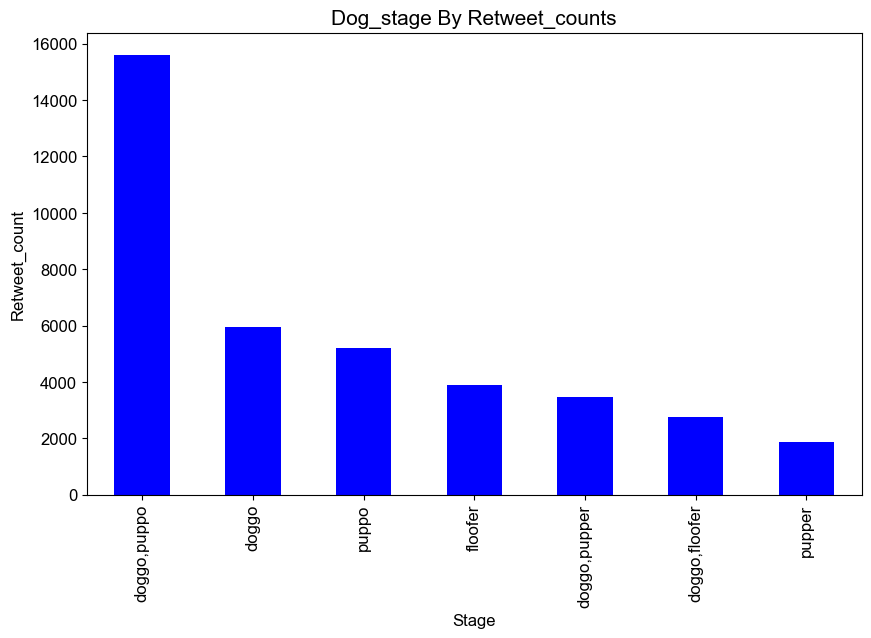

In [98]:
#To view average dog_stage by retweet_count
Top_Retweet = Twitter_archive_master.groupby('stage')['retweet_count'].mean().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
plt.title("Dog_stage By Retweet_counts", size = 15)
Top_Retweet.plot(kind = 'bar', fontsize = 12, color = 'b')
plt.xlabel('Stage', fontsize = 12)
plt.ylabel('Retweet_count', fontsize = 12);
sns.set_style("whitegrid");

In [99]:
#Dog stage with the most favorite_count
Twitter_archive_master.groupby('stage')['favorite_count'].sum().sort_values(ascending = False).astype(int)

stage
pupper           1161242
doggo            1042296
puppo             417560
doggo,pupper       96718
floofer            76427
doggo,puppo        40280
doggo,floofer      14353
Name: favorite_count, dtype: int64

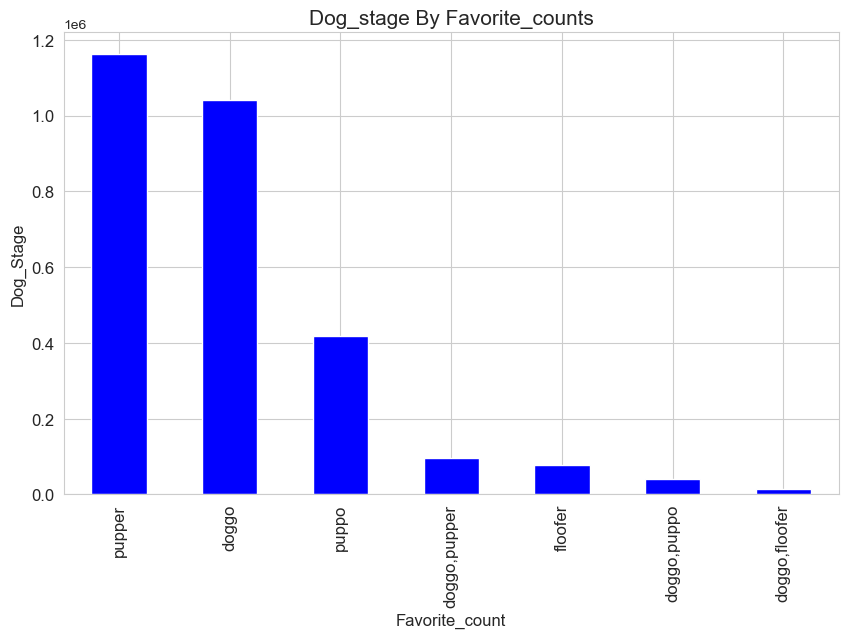

In [100]:
#Plotting a bar chart to view dog stage by favorite counts
Dog_stage = Twitter_archive_master.groupby('stage')['favorite_count'].sum().sort_values(ascending = False)
plt.figure(figsize = (10,6))
plt.title("Dog_stage By Favorite_counts", size = 15)
Dog_stage.plot(kind = 'bar', fontsize = 12, color = 'b')
plt.xlabel('Favorite_count', fontsize = 12)
plt.ylabel('Dog_Stage', fontsize = 12);
sns.set_style("whitegrid");

**Dog name with the highest retweet_count and favorite_count**

In [101]:
#Name with the highest total retweet_count 
Twitter_archive_master.groupby('name')['retweet_count'].sum().sort_values(ascending = False)

name
Bo            58606
Stephan       50546
Duddles       36623
Buddy         31015
Jamesy        29526
              ...  
Kollin           45
Julio            43
Christoper       41
Kallie           35
Bloo             35
Name: retweet_count, Length: 909, dtype: int64

In [102]:
#Name with the highest total favorite_count 
Twitter_archive_master.groupby('name')['favorite_count'].sum().sort_values(ascending = False)

name
Bo            155149
Stephan       108736
Jamesy        105684
Zoey           95280
Charlie        90434
               ...  
Kollin           199
Keet             190
Kallie           180
Fwed             164
Christoper       158
Name: favorite_count, Length: 909, dtype: int64

**Que. 2. What source is used more for tweet?**

In [103]:
#The most common device used to tweet
Twitter_archive_master['source_'].value_counts()

Twitter for iPhone    1839
Twitter Web Client      25
TweetDeck                9
Name: source_, dtype: int64

**Que. 3. What is the most common dog stage?**

In [104]:
#The most common dog stage
Twitter_archive_master.stage.value_counts()

pupper           194
doggo             60
puppo             22
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

**Que 4. A correlation between retweet_count and favorite_count**

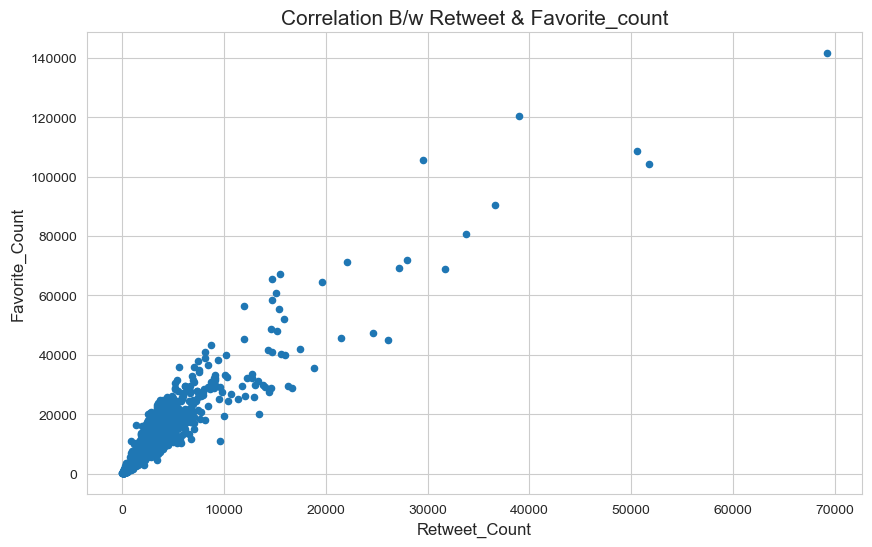

In [105]:
#Plooting a scatter plot to view the correlation b/w retweet_count & favorite_count
Twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize = (10,6))
plt.title('Correlation B/w Retweet & Favorite_count', fontsize = 15)
plt.xlabel('Retweet_Count', fontsize = 12)
plt.ylabel('Favorite_Count', fontsize = 12)
sns.set_style("whitegrid")